In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filepath = "datasets/FacilityLevelGHG_AllCounties.xlsx"

facility_leveldf_dict = pd.read_excel(filepath, None)

In [6]:
facility_leveldf_dict

{'2019':      REPORTING YEAR                              FACILITY NAME  GHGRP ID  \
 0              2019                 Hunterstown Combined Cycle   1000475   
 1              2019                Brunot Island Power Station   1007427   
 2              2019                                   Cheswick   1001198   
 3              2019  GUARDIAN INDUSTRIES CORP - FLOREFFE PLANT   1002921   
 4              2019                      Shenango Incorporated   1000235   
 ..              ...                                        ...       ...   
 394            2019                          Panda Liberty LLC   1012196   
 395            2019                              Panda Patriot   1012122   
 396            2019              TGP Station 310 Smethport, PA   1012158   
 397            2019                        UGI Utilities, Inc.   1007356   
 398            2019                   White Compressor Station   1011955   
 
             REPORTED ADDRESS   LATITUDE  LONGITUDE        CITY NA

In [7]:
for key in facility_leveldf_dict:
    
    if key == "2019": 
        continue
    new_column_names = list(facility_leveldf_dict[key].iloc[5,:])
    facility_leveldf_dict[key].columns = new_column_names
    facility_leveldf_dict[key] = facility_leveldf_dict[key].drop([0,1,2,3,4,5])
    
    

In [8]:
for key in facility_leveldf_dict:
    
    facility_leveldf_dict[key] = facility_leveldf_dict[key].reset_index(drop=True)
    facility_leveldf_dict[key]['COUNTY NAME'] = facility_leveldf_dict[key]['COUNTY NAME'].str.lower()
    facility_leveldf_dict[key]['COUNTY NAME'] = facility_leveldf_dict[key]['COUNTY NAME'].str.replace("county", "")
    facility_leveldf_dict[key]['COUNTY NAME'] = facility_leveldf_dict[key]['COUNTY NAME'].str.replace(" ", "")

In [9]:
bar_2019ghg_sums = facility_leveldf_dict['2019'].groupby(["COUNTY NAME"]).sum(["GHG QUANTITY (METRIC TONS CO2e)"])

In [10]:
facility_leveldf_dict['2019']

,REPORTING YEAR,FACILITY NAME,GHGRP ID,REPORTED ADDRESS,LATITUDE,LONGITUDE,CITY NAME,COUNTY NAME,STATE,ZIP CODE,PARENT COMPANIES,GHG QUANTITY (METRIC TONS CO2e),SUBPARTS
0,2019,Hunterstown Combined Cycle,1000475,1731 Hunterstown Road,39.872500,-77.167200,GETTYSBURG,adams,PA,17325,PLATINUM EQUITY ADVISORS LLC (100%),2236131,"C,D"
1,2019,Brunot Island Power Station,1007427,2849 WEST CARSON STREET,40.463800,-80.044000,PITTSBURGH,allegheny,PA,15204,GENON HOLDINGS INC (100%),41883,"C,D"
2,2019,Cheswick,1001198,100 Pittsburgh Street,40.538300,-79.790600,Springdale,allegheny,PA,15144,GENON HOLDINGS INC (100%),931915,"C,D"
3,2019,GUARDIAN INDUSTRIES CORP - FLOREFFE PLANT,1002921,1000 GLASSHOUSE ROAD,40.254237,-79.916438,Jefferson Hills,allegheny,PA,15025,GUARDIAN INDUSTRIES CORP (100%),0,NaN
4,2019,Shenango Incorporated,1000235,200 NEVILLE RD.,40.496700,-80.075600,PITTSBURGH,allegheny,PA,15225,DTE ENERGY CO (100%),0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,2019,Panda Liberty LLC,1012196,151 Liberty Lane,41.769366,-76.479444,Towanda,NaN,PA,18848,PANDA POWER FUNDS (100%),1851549,"C,D"
395,2019,Panda Patriot,1012122,50 Patriot Lane,41.188972,-76.895155,Montgomery,NaN,PA,17752,PANDA POWER FUNDS (100%),1442208,"C,D"
396,2019,"TGP Station 310 Smethport, PA",1012158,520 Bunker Hill Road,41.769446,-78.429719,Smethport,NaN,PA,16749,KINDER MORGAN INC (100%),40475,"C,W"
397,2019,"UGI Utilities, Inc.",1007356,1 UGI Drive,40.372376,-75.915056,Denver,NaN,PA,17517,UGI CORP (100%),155735,"NN,W"


In [11]:
bar_2019ghg_sums = bar_2019ghg_sums.drop(columns=['REPORTING YEAR','GHGRP ID', 'LATITUDE', 'LONGITUDE', 'ZIP CODE'])

In [12]:
bar_2019ghg_sumsascending = bar_2019ghg_sums.sort_values(["GHG QUANTITY (METRIC TONS CO2e)"], ascending=False)
bar_2019ghg_sumsascending

,GHG QUANTITY (METRIC TONS CO2e)
COUNTY NAME,
indiana,19618927
armstrong,11010515
allegheny,8522128
greene,7268728
delaware,5760964
...,...
huntingdon,47221
columbia,46855
pike,29147


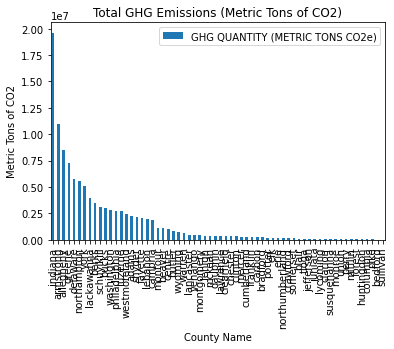

In [13]:
# Chart our data, give it a title, and label the axes
ghgsum_2019bar = bar_2019ghg_sumsascending.plot(kind="bar", title="Total GHG Emissions (Metric Tons of CO2)")
ghgsum_2019bar.set_xlabel("County Name")
ghgsum_2019bar.set_ylabel("Metric Tons of CO2")

plt.show()

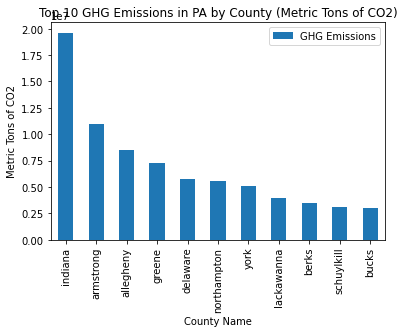

In [14]:
# Chart our data, give it a title, and label the axes

x = []
y = []
county_list = list(bar_2019ghg_sumsascending.index)

for i in range(11):
    
    y.append(bar_2019ghg_sumsascending.iloc[i,0])
    x.append(county_list[i])

bar_2019top5ghg_sums = pd.DataFrame({"GHG Emissions": y}, index = x)
    
ghgsumtop5_2019bar = bar_2019top5ghg_sums.plot(kind="bar", title="Top 10 GHG Emissions in PA by County (Metric Tons of CO2)")
ghgsumtop5_2019bar.set_xlabel("County Name")
ghgsumtop5_2019bar.set_ylabel("Metric Tons of CO2")

plt.show()

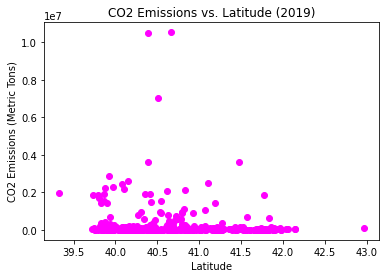

In [15]:
plt.title("CO2 Emissions vs. Latitude (2019)")
plt.xlabel("Latitude")
plt.ylabel("CO2 Emissions (Metric Tons)")
plt.scatter(facility_leveldf_dict['2019']["LATITUDE"], facility_leveldf_dict['2019']["GHG QUANTITY (METRIC TONS CO2e)"], marker="o", color="magenta")
plt.show()

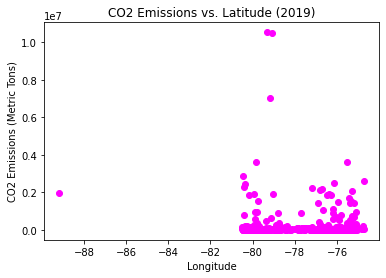

In [16]:
plt.title("CO2 Emissions vs. Latitude (2019)")
plt.xlabel("Longitude")
plt.ylabel("CO2 Emissions (Metric Tons)")
plt.scatter(facility_leveldf_dict['2019']["LONGITUDE"], facility_leveldf_dict['2019']["GHG QUANTITY (METRIC TONS CO2e)"], marker="o", color="magenta")
plt.show()

In [17]:
bar_2019ghg_parentcompany_sums = facility_leveldf_dict['2019'].groupby(["PARENT COMPANIES"]).sum(["GHG QUANTITY (METRIC TONS CO2e)"]).sort_values(["GHG QUANTITY (METRIC TONS CO2e)"], ascending=False)


bar_2019ghg_parentcompany_sums = bar_2019ghg_parentcompany_sums.drop(columns=['REPORTING YEAR','GHGRP ID', 'LATITUDE', 'LONGITUDE', 'ZIP CODE'])
bar_2019ghg_parentcompany_sums.head(10)

,GHG QUANTITY (METRIC TONS CO2e)
PARENT COMPANIES,
"ARCLIGHT CAPITAL PARTNERS,LLC (67.29%); BOWFIN KEYCON POWER LLC (3.7%); KEYCON POWER HOLDINGS LLC (16.67%); TALEN ENERGY CORP (12.34%)",10546345
"ARCLIGHT CAPITAL PARTNERS,LLC (57.61%); UGI CORP (5.97%); BOWFIN KEYCON POWER LLC (3.72%); KEYCON POWER HOLDINGS LLC (16.45%); TALEN ENERGY CORP (16.25%)",10483904
CONSOL ENERGY INC (100%),7599282
EFS-N LLC (100%),7013295
US STEEL CORP (100%),5186910
Vistra Energy Corp (100%),4965154
TALEN ENERGY CORP (100%),4457202
VOLT PARENT LP (100%),3908462
INVENERGY LLC (100%),3633234


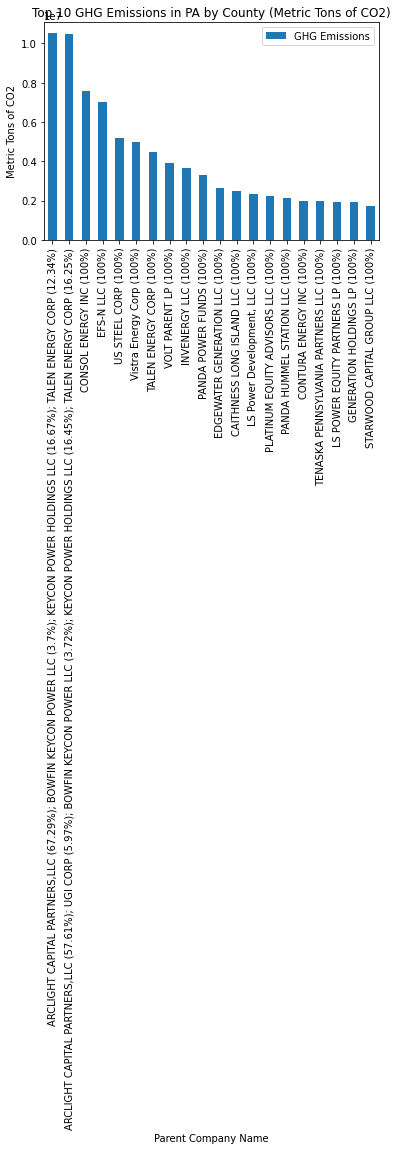

In [18]:
# Chart our data, give it a title, and label the axes

x = []
y = []
company_list = list(bar_2019ghg_parentcompany_sums.index)

for i in range(20):
    
    y.append(bar_2019ghg_parentcompany_sums.iloc[i,0])
    x.append(company_list[i])

parents_2019top20ghg_sums = pd.DataFrame({"GHG Emissions": y}, index = x)
    
parenttop20_2019bar = parents_2019top20ghg_sums.plot(kind="bar", title="Top 10 GHG Emissions in PA by County (Metric Tons of CO2)")
parenttop20_2019bar.set_xlabel("Parent Company Name")
parenttop20_2019bar.set_ylabel("Metric Tons of CO2")

plt.show()

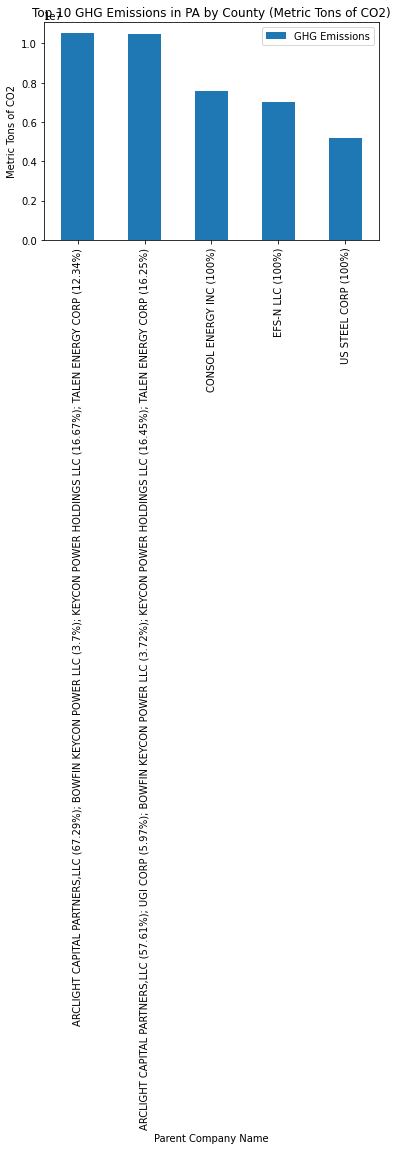

In [250]:
# Chart our data, give it a title, and label the axes

x = []
y = []
company_list = list(bar_2019ghg_parentcompany_sums.index)

for i in range(5):
    
    y.append(bar_2019ghg_parentcompany_sums.iloc[i,0])
    x.append(company_list[i])

parents_2019top20ghg_sums = pd.DataFrame({"GHG Emissions": y}, index = x)
    
parenttop20_2019bar = parents_2019top20ghg_sums.plot(kind="bar", title="Top 10 GHG Emissions in PA by County (Metric Tons of CO2)")
parenttop20_2019bar.set_xlabel("Parent Company Name")
parenttop20_2019bar.set_ylabel("Metric Tons of CO2")


plt.show()

In [19]:
from sqlalchemy import create_engine

dataoutput_path = '/datasets/clean_facilities.db'
engine = create_engine(f'sqlite://{dataoutput_path}', echo=False)
sqlite_connection = engine.connect()


In [20]:
for dataframe in facility_leveldf_dict:

    facility_leveldf_dict[f'{dataframe}'].to_sql(f'facility_leveldf_{dataframe}', sqlite_connection)